In [ ]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import percentile
from numpy.random import rand

1.	Load the given Time Series Data and print the first 10 rows of the data.

In [ ]:
# load the data

df = pd.read_csv("/content/Electric_Production.csv.xls")

In [ ]:
# print first 10 rows

df.head(10)

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
5,6/1/1985,58.0904
6,7/1/1985,62.6202
7,8/1/1985,63.2485
8,9/1/1985,60.5846
9,10/1/1985,56.3154


2.	Identify  the dimensionality of the Series

In [ ]:
#dimensionality of the dataset

df.shape

(397, 2)

3.	Find the monthly production on 1 May 1985 and 1 Feb 1987.

In [ ]:
rslt_df = df[df['DATE'] == '10/1/1985']
rslt_df

,DATE,IPG2211A2N
9,10/1/1985,56.3154


In [ ]:
# Find the monthly production on 1 May 1985 and 1 Feb 1987

rslt_df = df[df['DATE'] == '1/5/1985']
rslt_df

,DATE,IPG2211A2N


In [ ]:
# Find the monthly production on 1 May 1985 and 1 Feb 1987

rslt_df = df[df['DATE'] == '1/2/1987']
rslt_df

,DATE,IPG2211A2N


4.	Create the 7 number summary of the loaded time series.

In [ ]:
# calc 7 number summary
# Minimum,
# Lower fence (Q1 – (1.5 * IQR)),
# Lower hinge (usually the first quartile),
# Median,
# Upper hinge (usually the third quartile),
# Upper fence,(Q3 + (1.5 * IQR)),
# Maximum.

data = df['IPG2211A2N']

quantiles = percentile(data, [25, 50, 75 ])
iqr = quantiles[2] - quantiles[0]
lf = quantiles[0] - (1.5*iqr)
uf = quantiles[2] + (1.5*iqr)
data_min, data_max = data.min(), data.max()

print('Min: %.3f' % data_min)
print('Lower fence: %.3f' % lf)
print('Lower hinge/Q1: %.3f' % quantiles[0])
print('Median: %.3f' % quantiles[1])
print('Upper hinge/Q3: %.3f' % quantiles[2])
print('Upper fence: %.3f' % uf)
print('Max: %.3f' % data_max)

Min: 55.315
Lower fence: 41.976
Lower hinge/Q1: 77.105
Median: 89.779
Upper hinge/Q3: 100.524
Upper fence: 135.653
Max: 129.405


5.	Extract the date into month and year columns

In [ ]:
# 5.	Extract the date into month and year columns

df['DATE'] = pd.to_datetime(df['DATE'])
df['Month'] = df['DATE'].dt.strftime('%b')
df['Year'] = df['DATE'].dt.year
df

,DATE,IPG2211A2N,Month,Year
0,1985-01-01,72.5052,Jan,1985
1,1985-02-01,70.6720,Feb,1985
2,1985-03-01,62.4502,Mar,1985
3,1985-04-01,57.4714,Apr,1985
4,1985-05-01,55.3151,May,1985
...,...,...,...,...
392,2017-09-01,98.6154,Sep,2017
393,2017-10-01,93.6137,Oct,2017
394,2017-11-01,97.3359,Nov,2017
395,2017-12-01,114.7212,Dec,2017


6.	Find the lag=1 and lag=3 features for the given series data

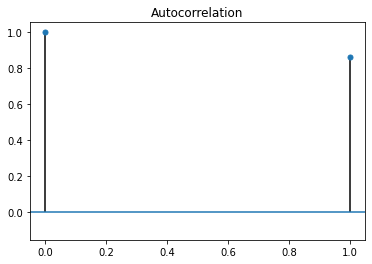

In [ ]:
# Find the lag=1 features for the given series data

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['IPG2211A2N'], lags=1)
plt.show()

Lag 1 features inference:

At time = 0, ACF = 1

At time=1, ACF = 0.9

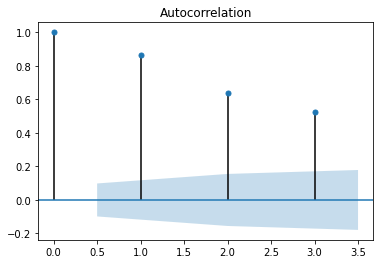

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['IPG2211A2N'], lags=3)
plt.show()

Lag 3 features inference:

At time = 0, ACF = 1

At time=3, ACF = 0.5

7.	Obtain the rolling mean features
8.	Obtain the rolling stats features

In [ ]:
# Obtain the rolling mean features

df['rolling_avg'] = df['IPG2211A2N'].rolling(5).mean()
df['rolling_std'] = df['IPG2211A2N'].rolling(5).std()
df.head(15)


,DATE,IPG2211A2N,Month,Year,rolling_avg,rolling_std
0,1985-01-01,72.5052,Jan,1985,NaN,NaN
1,1985-02-01,70.6720,Feb,1985,NaN,NaN
2,1985-03-01,62.4502,Mar,1985,NaN,NaN
3,1985-04-01,57.4714,Apr,1985,NaN,NaN
4,1985-05-01,55.3151,May,1985,63.68278,7.694200
5,1985-06-01,58.0904,Jun,1985,60.79982,6.096827
6,1985-07-01,62.6202,Jul,1985,59.18946,3.223846
7,1985-08-01,63.2485,Aug,1985,59.34912,3.438337
8,1985-09-01,60.5846,Sep,1985,59.97176,3.292067
9,1985-10-01,56.3154,Oct,1985,60.17182,2.951067


9.	Obtain auto-correlation and histogram-plot

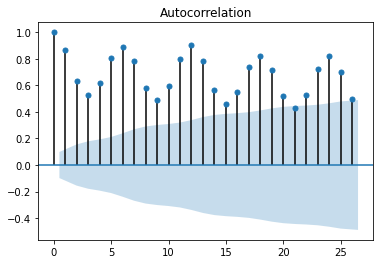

In [ ]:
# Obtain auto-correlation and histogram-plot

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['IPG2211A2N'])
plt.show()

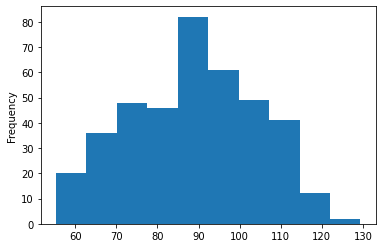

In [ ]:
# histogram

ax = df['IPG2211A2N'].plot.hist()

In [ ]:
df

,DATE,IPG2211A2N,Month,Year,rolling_avg,rolling_std
0,1985-01-01,72.5052,Jan,1985,NaN,NaN
1,1985-02-01,70.6720,Feb,1985,NaN,NaN
2,1985-03-01,62.4502,Mar,1985,NaN,NaN
3,1985-04-01,57.4714,Apr,1985,NaN,NaN
4,1985-05-01,55.3151,May,1985,63.68278,7.694200
...,...,...,...,...,...,...
392,2017-09-01,98.6154,Sep,2017,102.78682,8.029963
393,2017-10-01,93.6137,Oct,2017,103.09346,7.532794
394,2017-11-01,97.3359,Nov,2017,102.13000,7.978033
395,2017-12-01,114.7212,Dec,2017,102.64348,8.822408


10.	Obtain the Multiple Lag scatter plots and infer its relation (do for lag=1 to lag=7)

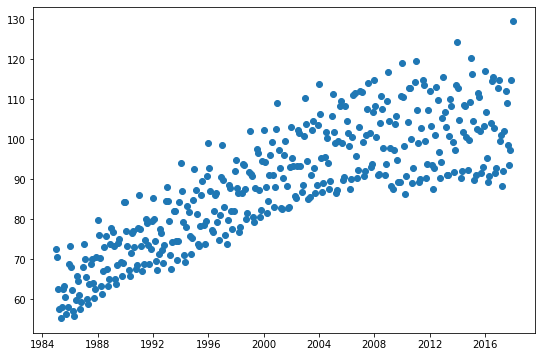

In [ ]:
# Obtain the Multiple Lag scatter plots and infer its relation (do for lag=1 to lag=7)
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(df['DATE'] ,df['IPG2211A2N']);

Inference: During 1984, the prduction was around 50, and it went till 130 as time increased
